<a href="https://colab.research.google.com/github/NagrajSrivatsa15/ParkinsonDetectionusingML/blob/main/ParkinsonDisease_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Dependencies

In [1]:
#imported for arrays
import numpy as np
#creatiung daata frames
import pandas as pd
#spliting data
from sklearn.model_selection import train_test_split
#data preprocessing
from sklearn.preprocessing import StandardScaler
#Support Vector machine
from sklearn import svm
import seaborn as sns
#model Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

#Dataset Collection 

In [2]:
ParkinsonDataset=pd.read_csv('/content/ParkinsonDiseaseDataset.csv')
#printing the first 5 rows of dataframe
ParkinsonDataset.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


#Checking Number of rows and columns in the datset

In [3]:
ParkinsonDataset.shape

(195, 24)

#Information about the dataset

In [4]:
ParkinsonDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

#Finding all the columns

In [5]:
ParkinsonDataset.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [6]:
ParkinsonDataset.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


#Finding if any NAN values in the dataset

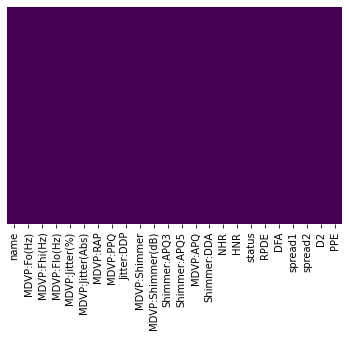

In [7]:
sns.heatmap(ParkinsonDataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#finding how many are PD patients and healthy and thier relations 

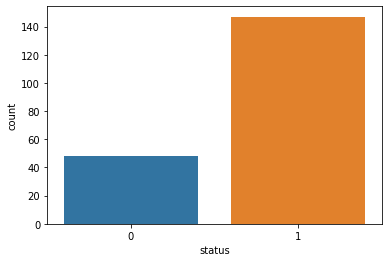

In [8]:
ParkinsonDataset['status'].value_counts()

sns.countplot(x = 'status',data=ParkinsonDataset)

#Data Preprocessing

In [9]:
#cleaning the data-->removing name column as its not required
ParkinsonDataset.drop(['name'],axis=1,inplace=True)

#data Standardization(Scalar function)

In [10]:
X = ParkinsonDataset.drop('status',axis=1)
scaler=StandardScaler()

In [11]:
scaler.fit(ParkinsonDataset.drop('status',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
scaler_feature = scaler.transform(ParkinsonDataset.drop('status',axis=1))

In [13]:
ParkinsonDataset_feature = pd.DataFrame(scaler_feature,columns=X.columns)

In [14]:
ParkinsonDataset_feature.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,-0.829300,-0.436165,-0.952037,0.334914,0.749759,0.132963,0.760800,0.131755,0.745985,0.739536,0.607859,1.119147,0.332985,0.607532,-0.067893,-0.193225,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.868886
1,-0.770972,-0.530974,-0.057721,0.715418,1.037674,0.453892,1.276809,0.452684,1.681731,1.768464,1.547912,2.276504,1.159454,1.548254,-0.137843,-0.634508,-0.387524,1.837562,1.479853,1.311185,0.275077,1.803605
2,-0.909476,-0.723168,-0.109875,0.884991,1.325589,0.720770,1.585687,0.721813,1.202693,1.027636,1.175643,1.726176,0.699187,1.175323,-0.291633,-0.279760,-0.662075,1.942048,1.141445,1.017682,-0.103629,1.402661
3,-0.909622,-0.649092,-0.114229,0.775389,1.325589,0.578885,1.284076,0.577677,1.340396,1.207698,1.340547,1.848749,0.806859,1.340229,-0.280719,-0.281346,-0.613134,1.832380,1.440945,1.293840,0.062145,1.806954
4,-0.925657,-0.606245,-0.130608,1.368893,1.901418,1.095750,2.047187,1.096793,1.836448,1.552389,1.899444,2.532491,1.216839,1.899461,-0.178026,-0.506745,-0.783021,1.909364,1.780940,0.096195,-0.130026,2.267082


#Now Splitting of data

In [120]:
X=ParkinsonDataset_feature
Y=ParkinsonDataset['status']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

#KNN Model Training

In [121]:
from sklearn.neighbors import KNeighborsClassifier

In [122]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
KNN_prediction = knn.predict(X_train)
print(KNN_prediction)

[1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0
 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]


In [123]:
print('Classification report')
print(classification_report(Y_train,KNN_prediction))
print('\n')
print('Confusion matrix')
print(confusion_matrix(Y_train,KNN_prediction))

Classification report
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        33
           1       0.99      0.98      0.99       103

    accuracy                           0.98       136
   macro avg       0.97      0.98      0.97       136
weighted avg       0.98      0.98      0.98       136



Confusion matrix
[[ 32   1]
 [  2 101]]


In [124]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
KNN_prediction_test = knn.predict(X_test)
print(KNN_prediction_test)

[1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1
 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0]


#Model Evaluation-KNN

In [125]:
print('Classification report')
print(classification_report(Y_test,KNN_prediction_test))
print('\n')
print('Confusion matrix')
print(confusion_matrix(Y_test,KNN_prediction_test))

Classification report
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.93      0.95      0.94        44

    accuracy                           0.92        59
   macro avg       0.90      0.88      0.89        59
weighted avg       0.91      0.92      0.91        59



Confusion matrix
[[12  3]
 [ 2 42]]


#ConfusionMatrrix

Text(51.0, 0.5, 'Truth')

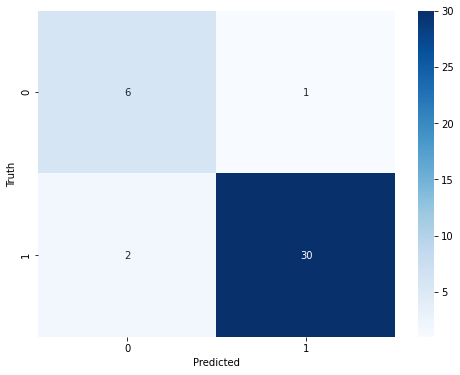

In [ ]:
import matplotlib.pyplot as plt
cm=confusion_matrix(Y_test,KNN_prediction_test)
import seaborn as sn
plt.figure(figsize=(8,6))
fg=sn.heatmap(cm,annot=True,cmap='Blues')
figure = fg.get_figure()
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [126]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,KNN_prediction_test)*100
print(f'model accuracy is : {accuracy.round()} %')

model accuracy is : 92.0 %


In [127]:
#f1, precesion, recall
from sklearn.metrics import f1_score
score = f1_score(Y_test,KNN_prediction_test, average='binary')
print('F-Measure for KNN : %.3f' % score)

from sklearn.metrics import recall_score
recall = recall_score(Y_test,KNN_prediction_test, average='binary')
print('Recall for KNN: %.3f' % recall)


from sklearn.metrics import precision_score
precision = precision_score(Y_test,KNN_prediction_test, average='binary')
print('Precision for KNN: %.3f' % precision)

F-Measure for KNN : 0.944
Recall for KNN: 0.955
Precision for KNN: 0.933


#K cross validation tecnique

*   List item
*   List item



In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
scores = cross_val_score(knn, X, Y , cv = 10, scoring= 'accuracy')
print(scores)
print(scores.mean())

[0.7        0.95       0.9        0.75       1.         0.94736842
 0.78947368 0.73684211 0.78947368 0.68421053]
0.8247368421052632


In [34]:
X=ParkinsonDataset_feature
Y=ParkinsonDataset['status']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

#SVM Implementation

In [112]:
model=svm.SVC(kernel='linear')
model.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [113]:
SVM_train_Predcition=model.predict(X_train)
print(SVM_train_Predcition)

[1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1
 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [114]:
#Training
print('Classification report')
print(classification_report(Y_train,SVM_train_Predcition))
print('\n')
print('Confusion matrix')
print(confusion_matrix(Y_train,SVM_train_Predcition))

Classification report
              precision    recall  f1-score   support

           0       1.00      0.64      0.78        33
           1       0.90      1.00      0.94       103

    accuracy                           0.91       136
   macro avg       0.95      0.82      0.86       136
weighted avg       0.92      0.91      0.90       136



Confusion matrix
[[ 21  12]
 [  0 103]]


In [115]:
#Testing 
SVM_test_Predcition=model.predict(X_test)
print(SVM_test_Predcition)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1
 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0]


In [116]:
#Classification Report
print('Classification report')
print(classification_report(Y_test,SVM_test_Predcition))
print('\n')
print('Confusion matrix')
print(confusion_matrix(Y_test,SVM_test_Predcition))

Classification report
              precision    recall  f1-score   support

           0       0.82      0.60      0.69        15
           1       0.88      0.95      0.91        44

    accuracy                           0.86        59
   macro avg       0.85      0.78      0.80        59
weighted avg       0.86      0.86      0.86        59



Confusion matrix
[[ 9  6]
 [ 2 42]]


In [117]:
#CV method
model=svm.SVC(kernel='linear')
scores = cross_val_score(model, X, Y , cv = 10, scoring= 'accuracy')
print(scores)
print(scores.mean())

[0.95       0.95       0.8        0.85       0.95       0.68421053
 0.52631579 0.73684211 0.78947368 0.73684211]
0.7973684210526316


Text(51.0, 0.5, 'Truth')

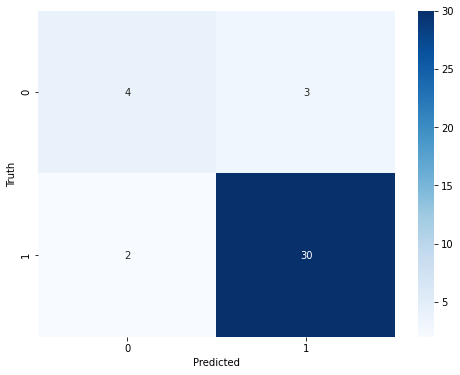

In [ ]:
#Confusion Matrix

import matplotlib.pyplot as plt
cm=confusion_matrix(Y_test,SVM_test_Predcition)
import seaborn as sn
plt.figure(figsize=(8,6))
fg=sn.heatmap(cm,annot=True,cmap='Blues')
figure = fg.get_figure()
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [118]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,SVM_test_Predcition)*100
print(f'model accuracy is : {accuracy.round()} %')

model accuracy is : 86.0 %


In [119]:
#f1, precesion, recall
from sklearn.metrics import f1_score
score = f1_score(Y_test,SVM_test_Predcition, average='binary')
print('F-Measure for SVM : %.3f' % score)

from sklearn.metrics import recall_score
recall = recall_score(Y_test,SVM_test_Predcition, average='binary')
print('Recall for SVM: %.3f' % recall)


from sklearn.metrics import precision_score
precision = precision_score(Y_test,SVM_test_Predcition, average='binary')
print('Precision for SVM: %.3f' % precision)

F-Measure for SVM : 0.913
Recall for SVM: 0.955
Precision for SVM: 0.875


#Logistic Regression

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
log_reg = LogisticRegression()

In [105]:
X=ParkinsonDataset_feature
Y=ParkinsonDataset['status']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [106]:
#Training
log_reg.fit(X_train,Y_train)
LR_Train_prediction = log_reg.predict(X_train)
print(LR_Train_prediction)



[1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1
 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1]


In [107]:
print('Classification report')
print(classification_report(Y_train,LR_Train_prediction))
print('\n')
print('Confusion matrix')
print(confusion_matrix(Y_train,LR_Train_prediction))

Classification report
              precision    recall  f1-score   support

           0       0.84      0.64      0.72        33
           1       0.89      0.96      0.93       103

    accuracy                           0.88       136
   macro avg       0.87      0.80      0.82       136
weighted avg       0.88      0.88      0.88       136



Confusion matrix
[[21 12]
 [ 4 99]]


In [108]:
prediction_LR_Test = log_reg.predict(X_test)
print(prediction_LR_Test)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0]


In [109]:
print('Classification report')
print(classification_report(Y_test,prediction_LR_Test))
print('\n')
print('Confusion matrix')
print(confusion_matrix(Y_test,prediction_LR_Test))

Classification report
              precision    recall  f1-score   support

           0       0.82      0.60      0.69        15
           1       0.88      0.95      0.91        44

    accuracy                           0.86        59
   macro avg       0.85      0.78      0.80        59
weighted avg       0.86      0.86      0.86        59



Confusion matrix
[[ 9  6]
 [ 2 42]]


Text(51.0, 0.5, 'Truth')

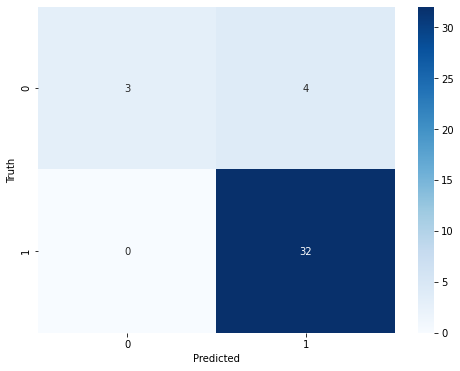

In [ ]:
#Confusion Matrix

import matplotlib.pyplot as plt
cm=confusion_matrix(Y_test,prediction_LR_Test)
import seaborn as sn
plt.figure(figsize=(8,6))
fg=sn.heatmap(cm,annot=True,cmap='Blues')
figure = fg.get_figure()
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [110]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,prediction_LR_Test)*100
print(f'model accuracy is : {accuracy.round()} %')

model accuracy is : 86.0 %


In [111]:
#f1, precesion, recall
from sklearn.metrics import f1_score
score = f1_score(Y_test,prediction_LR_Test, average='binary')
print('F-Measure for Logistic regression : %.3f' % score)

from sklearn.metrics import recall_score
recall = recall_score(Y_test,prediction_LR_Test, average='binary')
print('Recall for Logistic regression: %.3f' % recall)


from sklearn.metrics import precision_score
precision = precision_score(Y_test,prediction_LR_Test, average='binary')
print('Precision for Logistic regression: %.3f' % precision)

F-Measure for Logistic regression : 0.913
Recall for Logistic regression: 0.955
Precision for Logistic regression: 0.875


In [ ]:
#CV method

#CV method
log_reg = LogisticRegression()
scores = cross_val_score(log_reg, X, Y , cv = 10, scoring= 'accuracy')
print(scores)
print(scores.mean())

[0.95       0.9        0.8        0.85       1.         0.68421053
 0.52631579 0.73684211 0.84210526 0.73684211]
0.8026315789473685


#Decesion Tree

In [94]:
X = ParkinsonDataset.drop('status',axis=1)
y = ParkinsonDataset['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
dt = DecisionTreeClassifier()

In [97]:
dt.fit(X_train,y_train)
dt_prediction = dt.predict(X_train)
print(dt_prediction)

[1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1]


In [98]:
#Classifcation Report:

print('Classification report')
print(classification_report(y_train,dt_prediction))
print('\n')
print('Confusion matrix')
print(confusion_matrix(y_train,dt_prediction))

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00       103

    accuracy                           1.00       136
   macro avg       1.00      1.00      1.00       136
weighted avg       1.00      1.00      1.00       136



Confusion matrix
[[ 33   0]
 [  0 103]]


In [99]:
#testing dataset
dt_prediction_test = dt.predict(X_test)
print(dt_prediction_test)

[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1
 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0]


In [100]:
print('Classification report')
print(classification_report(y_test,dt_prediction_test))
print('\n')
print('Confusion matrix')
print(confusion_matrix(y_test,dt_prediction_test))

Classification report
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        15
           1       0.91      0.93      0.92        44

    accuracy                           0.88        59
   macro avg       0.85      0.83      0.84        59
weighted avg       0.88      0.88      0.88        59



Confusion matrix
[[11  4]
 [ 3 41]]


#Confusion Matrix

Text(51.0, 0.5, 'Truth')

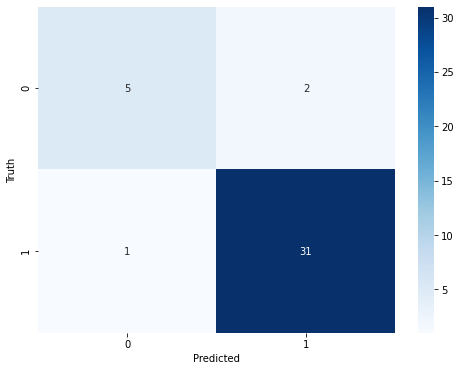

In [ ]:
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,dt_prediction_test)
import seaborn as sn
plt.figure(figsize=(8,6))
fg=sn.heatmap(cm,annot=True,cmap='Blues')
figure = fg.get_figure()
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [101]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,dt_prediction_test)*100
print(f'model accuracy is : {accuracy.round()} %')

model accuracy is : 88.0 %


In [102]:
#f1, precesion, recall
from sklearn.metrics import f1_score
score = f1_score(y_test,dt_prediction_test, average='binary')
print('F-Measure for Decision Tree : %.3f' % score)

from sklearn.metrics import recall_score
recall = recall_score(y_test,dt_prediction_test, average='binary')
print('Recall for Decision Tree: %.3f' % recall)


from sklearn.metrics import precision_score
precision = precision_score(y_test,dt_prediction_test, average='binary')
print('Precision for Decision Tree: %.3f' % precision)

F-Measure for Decision Tree : 0.921
Recall for Decision Tree: 0.932
Precision for Decision Tree: 0.911


In [ ]:
#CV method

#CV method
dt = DecisionTreeClassifier()
scores = cross_val_score(dt, X, y , cv = 10, scoring= 'accuracy')
print(scores)
print(scores.mean())

[0.95       0.9        0.8        0.9        0.9        0.78947368
 0.68421053 0.52631579 0.73684211 0.84210526]
0.8028947368421054


#Random Forest

In [85]:
from sklearn.ensemble import RandomForestClassifier
X = ParkinsonDataset.drop('status',axis=1)
y = ParkinsonDataset['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [86]:
rf = RandomForestClassifier()

In [87]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [88]:

rf_prediction_train = rf.predict(X_train)
print(rf_prediction_train)

[1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1]


In [89]:
#classification Report
print('Classification report')
print(classification_report(y_train,rf_prediction_train))
print('\n')
print('Confusion matrix')
print(confusion_matrix(y_train,rf_prediction_train))

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00       103

    accuracy                           1.00       136
   macro avg       1.00      1.00      1.00       136
weighted avg       1.00      1.00      1.00       136



Confusion matrix
[[ 33   0]
 [  0 103]]


In [90]:
rf_prediction_test = rf.predict(X_test)
print(rf_prediction_test)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1
 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0]


In [91]:
#classification Report
print('Classification report')
print(classification_report(y_test,rf_prediction_test))
print('\n')
print('Confission matrix')
print(confusion_matrix(y_test,rf_prediction_test))

Classification report
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.94      1.00      0.97        44

    accuracy                           0.95        59
   macro avg       0.97      0.90      0.93        59
weighted avg       0.95      0.95      0.95        59



Confission matrix
[[12  3]
 [ 0 44]]


Text(51.0, 0.5, 'Truth')

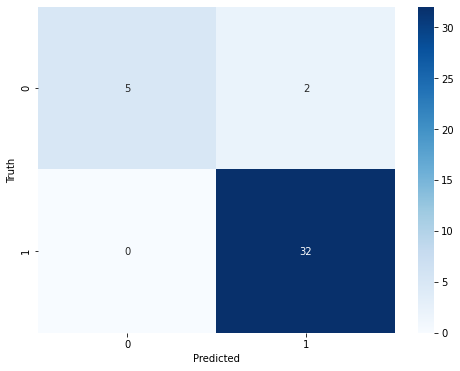

In [ ]:
#Confusion Matrix
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,rf_prediction_test)
import seaborn as sn
plt.figure(figsize=(8,6))
fg=sn.heatmap(cm,annot=True,cmap='Blues')
figure = fg.get_figure()
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [92]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,rf_prediction_test)*100
print(f'model accuracy is : {accuracy.round()} %')

model accuracy is : 95.0 %


In [93]:
#f1, precesion, recall
from sklearn.metrics import f1_score
score = f1_score(y_test,rf_prediction_test, average='binary')
print('F-Measure for Random Forest : %.3f' % score)

from sklearn.metrics import recall_score
recall = recall_score(y_test,rf_prediction_test, average='binary')
print('Recall for Random Forest: %.3f' % recall)


from sklearn.metrics import precision_score
precision = precision_score(y_test,rf_prediction_test, average='binary')
print('Precision for Random Forest: %.3f' % precision)

F-Measure for Random Forest : 0.967
Recall for Random Forest: 1.000
Precision for Random Forest: 0.936


In [ ]:
#CV method
rf = RandomForestClassifier()
scores = cross_val_score(rf, X, y , cv = 10, scoring= 'accuracy')
print(scores)
print(scores.mean())

[0.8        1.         0.9        0.95       1.         0.84210526
 0.89473684 0.78947368 0.78947368 0.73684211]
0.8702631578947368


#XGBOOST

In [78]:
from xgboost import XGBClassifier
X = ParkinsonDataset.drop('status',axis=1)
y = ParkinsonDataset['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
modelXG=XGBClassifier()

In [79]:
modelXG.fit(X_train,y_train)
xg_prediction_Train = modelXG.predict(X_train)
print(xg_prediction_Train)


[1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1]


In [80]:
#classification Report
print('Classification report')
print(classification_report(y_train,xg_prediction_Train))
print('\n')
print('Confusion matrix')
print(confusion_matrix(y_train,xg_prediction_Train))

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00       103

    accuracy                           1.00       136
   macro avg       1.00      1.00      1.00       136
weighted avg       1.00      1.00      1.00       136



Confusion matrix
[[ 33   0]
 [  0 103]]


In [81]:
XG_prediction_test = modelXG.predict(X_test)
print(XG_prediction_test)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1
 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0]


In [81]:
print('Classification report')
print(classification_report(y_test,XG_prediction_test))
print('\n')
print('Confusion matrix')
print(confusion_matrix(y_test,XG_prediction_test))

Text(51.0, 0.5, 'Truth')

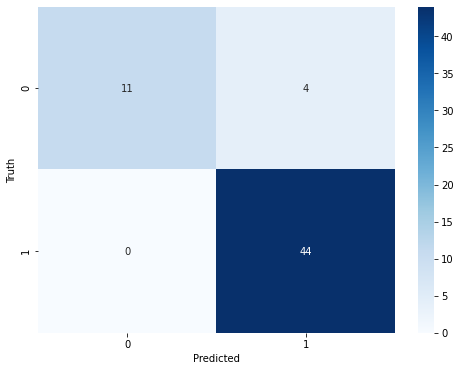

In [82]:
#Confusion Matrix
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,XG_prediction_test)
import seaborn as sn
plt.figure(figsize=(8,6))
fg=sn.heatmap(cm,annot=True,cmap='Blues')
figure = fg.get_figure()
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [83]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,XG_prediction_test)*100
print(f'model accuracy is : {accuracy.round()} %')

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test,XG_prediction_test))
print("RMSE: %f" % (rmse))

model accuracy is : 93.0 %
RMSE: 0.260378


In [84]:
#f1, precesion, recall
from sklearn.metrics import f1_score
score = f1_score(y_test,XG_prediction_test, average='binary')
print('F-Measure for XGBOOST : %.3f' % score)

from sklearn.metrics import recall_score
recall = recall_score(y_test,XG_prediction_test, average='binary')
print('Recall for XGBOOST: %.3f' % recall)


from sklearn.metrics import precision_score
precision = precision_score(y_test,XG_prediction_test, average='binary')
print('Precision for XGBOOST: %.3f' % precision)

F-Measure for XGBOOST : 0.957
Recall for XGBOOST: 1.000
Precision for XGBOOST: 0.917


In [ ]:
#CV method
modelXG.fit(X_train,y_train)
scores = cross_val_score(modelXG, X, y , cv = 10, scoring= 'accuracy')
print(scores)
print(scores.mean())

[0.85       1.         0.85       0.9        1.         0.84210526
 0.94736842 0.78947368 0.84210526 0.89473684]
0.891578947368421
